# Condition Monitoring of Hydraulic Systems
#### Trio Pambudi Utomo - FGA_DTS
Source: [UCI Machine Learning](https://archive.ics.uci.edu/ml/datasets/Condition+monitoring+of+hydraulic+systems)

### Deskripsi Dataset

Set data secara eksperimental diperoleh dengan rig uji hidrolik. Rig uji ini terdiri dari kerja primer dan sirkuit filtrasi pendingin sekunder yang dihubungkan melalui tangki oli. Sistem secara berulang mengulangi siklus beban konstan (durasi 60 detik) dan mengukur nilai proses seperti tekanan, aliran volume dan suhu, sementara kondisi empat komponen hidrolik (pendingin, katup, pompa dan akumulator) bervariasi secara kuantitatif.

![][]

Set data berisi data sensor proses mentah (mis. Tanpa ekstraksi fitur) yang terstruktur sebagai matriks dengan baris yang mewakili siklus dan kolom mewakili poin data dalam suatu siklus. Sensor yang digunakan adalah:

|Sensor|Physical quantity|Unit|Sampling rate||Sensor|Physical quantity|Unit|Sampling rate|
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
|PS1|Pressure|bar|100 Hz|   |TS1|Temperature|°C|1 Hz|
|PS2|Pressure|bar|100 Hz|   |TS2|Temperature|°C|1 Hz|
|PS3|Pressure|bar|100 Hz|   |TS3|Temperature|°C|1 Hz|
|PS4|Pressure|bar|100 Hz|   |TS4|Temperature|°C|1 Hz|
|PS5|Pressure|bar|100 Hz|   |VS1|Vibration|mm/s|1 Hz|
|PS6|Pressure|bar|100 Hz|   |CE|Cooling efficiency (virtual)|%|1 Hz|
|EPS1|Motor power|W|100 Hz|    |CP|Cooling power (virtual)|kW|1 Hz|
|FS1|Volume flow|l/min|10 Hz|     |SE|Efficiency factor|%|1 Hz|
|FS2|Volume flow|l/min|10 Hz|     |||||

Nilai kondisi target adalah siklus-beranotasi di ‘profile.txt‘. Seperti sebelumnya, nomor baris mewakili nomor siklus. Kolomnya adalah:

|Cooler condition (%)|Valve condition (%)|Internal pump leakage|Hydraulic accumulator (bar)|Stable flag|
|:---|:---|:---|:---|:---|
|3: close to total failure|100: optimal switching behavior|0: no leakage|130: optimal pressure|0: conditions were stable|
|20: reduced effifiency|90: small lag|1: weak leakage|115: slightly reduced pressure|1: static conditions might not have been reached yet|
|100: full efficiency|80: severe lag|2: severe leakage|100: severely reduced pressure||
||73: close to total failure||90: close to total failure||

###### <center> Oke, setelah mengetahui semua informasinya, kita kerjakan projeknya!!!<center/>

<img src="https://media.giphy.com/media/UcK7JalnjCz0k/giphy.gif" width="480" height="360">


## Regression Model

### 1. Mengumpulkan data
Seperti yang telah dijelaskan diatas, data terdiri dari 18 jenis pembacaan sensor. Sehingga,
#### 1a. Data
Data pembacaan sensor dalam set data ini adalah, tekanan (PS1, PS2, PS3, PS4), motor power (EPS1), volume aliran (FS1, FS2), suhu (TS1, TS2, TS3, TS4), getaran (VS1), koefisien pendinginan (CE), power pendinginan (CP), dan faktor efisiensi (SE)

In [1]:
import pandas as pd
import sys
# Menyembunyikan Warning
import warnings
warnings.filterwarnings('ignore')

# Data yang digunakan adalah semua data diatas
# List semua sensor (feature)

list_feature = ["PS1","PS2","PS3","PS4","PS5","PS6","EPS1",
                "FS1","FS2","TS1","TS2","TS3","TS4","VS1",
                "CP","CE","SE"]

# Membuat dataframe dari sensor-sensor tersebut
features = pd.DataFrame()
print("!!!Membaca data!!!")
for i,feature in enumerate(list_feature): 
    
    # Menampilkan persentase proses
    sys.stdout.write("\r[%-50s] %d%%" % ('='*int(((i+1)/len(list_feature))*50), ((i+1)/len(list_feature))*100))
    sys.stdout.flush()
    
    # Membaca data
    # path = "https://hydraulic-final.s3.amazonaws.com/" # Jika dari S3, aktifkan
    path = "/home/trio_pu/Hydraulic/" # Jika dari hdd, aktifkan
    data = pd.read_csv(path+feature+".txt", delimiter = "\t", header = None)
    
    # Setiap siklus direrata untuk mendapatkan 1 nilai pada 1 baris dalam sensor-sensor tersebut
    # Kemuduian disimpan dalam setiap label
    features[feature] = data.mean(axis = 1)

!!!Membaca data!!!
[==================================================] 100%

In [2]:
display(features.head()) # Menampilkan lima data pertama dari sensor tekanan 1

,PS1,PS2,PS3,PS4,PS5,PS6,EPS1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,CP,CE,SE
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,0.576950,1.862750,39.601350,59.157183
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,0.565850,1.255550,25.786433,59.335617
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150,0.576533,1.113217,22.218233,59.543150
3,160.188088,109.064807,1.946575,0.0,9.438827,9.337430,2511.541633,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467,0.569267,1.062150,20.459817,59.794900
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900,0.577367,1.070467,19.787017,59.455267


###### <center>Data telah diperoleh!<center/>
<img src="https://media.giphy.com/media/3oriO7A7bt1wsEP4cw/source.gif" width="480">

#### 1b. Label Data
Dalam dataset ini, label terdiri dari kondisi pendingin, kondisi katup, kebocoran pompa dalam, akumulator hidrolik, dan tanda stabilitas. Kondisi pendingin terdiri dari _close to total failure, reduced effifiency, dan full efficiency_. Konisi katup terdiri dari _optimal switching behavior, small lag, severe lag, dan close to total failure_. Kebocoran pompa dalam terdiri dari _no leakage, weak leakage, severe leakage_. Akumulator hidrolik terdiri dari _optimal pressure, slightly reduced pressure, severely reduced pressure, dan close to total failure_. Tanda stabilitas terdiri dari _conditions were stable dan static conditions might not have been reached yet_. Dengan keterangan-keterangan yang bisa dilihat di deskripsi diatas.

In [23]:
# Mendapatkan label
# Data label
names = ["Cooler condition (%)","Valve condition (%)","Internal pump leakage","Hydraulic accumulator (bar)","Stable flag"]
label = pd.read_csv("/home/trio_pu/Hydraulic/profile.txt", delimiter = "\t", header = None, names = names)

In [4]:
display(label.head()) # Menampilkan lima data pertama dari label

,Cooler condition (%),Valve condition (%),Internal pump leakage,Hydraulic accumulator (bar),Stable flag
0,3,100,0,130,1
1,3,100,0,130,1
2,3,100,0,130,1
3,3,100,0,130,1
4,3,100,0,130,1


#### 1c. Menggabungka data
Setelah data dan label didapat, agar memudahkan proses selanjutnya, data dan label digabungkan dalam satu dataframe.

In [5]:
# Menggabungkan fitur dan label dalam 1 dataframe
data = pd.concat([features, label], sort=False, axis =1)
display(data.head())

,PS1,PS2,PS3,PS4,PS5,PS6,EPS1,FS1,FS2,TS1,...,TS4,VS1,CP,CE,SE,Cooler condition (%),Valve condition (%),Internal pump leakage,Hydraulic accumulator (bar),Stable flag
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,...,31.745250,0.576950,1.862750,39.601350,59.157183,3,100,0,130,1
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,...,34.493867,0.565850,1.255550,25.786433,59.335617,3,100,0,130,1
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,...,35.646150,0.576533,1.113217,22.218233,59.543150,3,100,0,130,1
3,160.188088,109.064807,1.946575,0.0,9.438827,9.337430,2511.541633,6.720565,10.302678,38.879050,...,36.579467,0.569267,1.062150,20.459817,59.794900,3,100,0,130,1
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,...,37.427900,0.577367,1.070467,19.787017,59.455267,3,100,0,130,1


###### <center>Sekarang, data sensor dan label telah bergabung.<center/>

<img src = "https://media.giphy.com/media/P4TqKx6NHyLnO/giphy.gif" width = "480" height = "360">

#### 1d. Memplotkan data dalam bentuk scatterplot
Untuk mencari hubungan antara variabel, maka diplotkan ke dalam scatter plot. Karena data sangat banyak, maka dipilih hanya satu dari sensor-sensor yang sama (misal, hanya dipilih PS1 dari PS1, PS2, PS3, PS4, PS5, dan PS6). Selanjutnya, untuk mengetahui data manakah yang memiliki korelasi terkuat, maka diplotkan dan dihitung correlation coefficientnya, pada langkah selanjutnya.

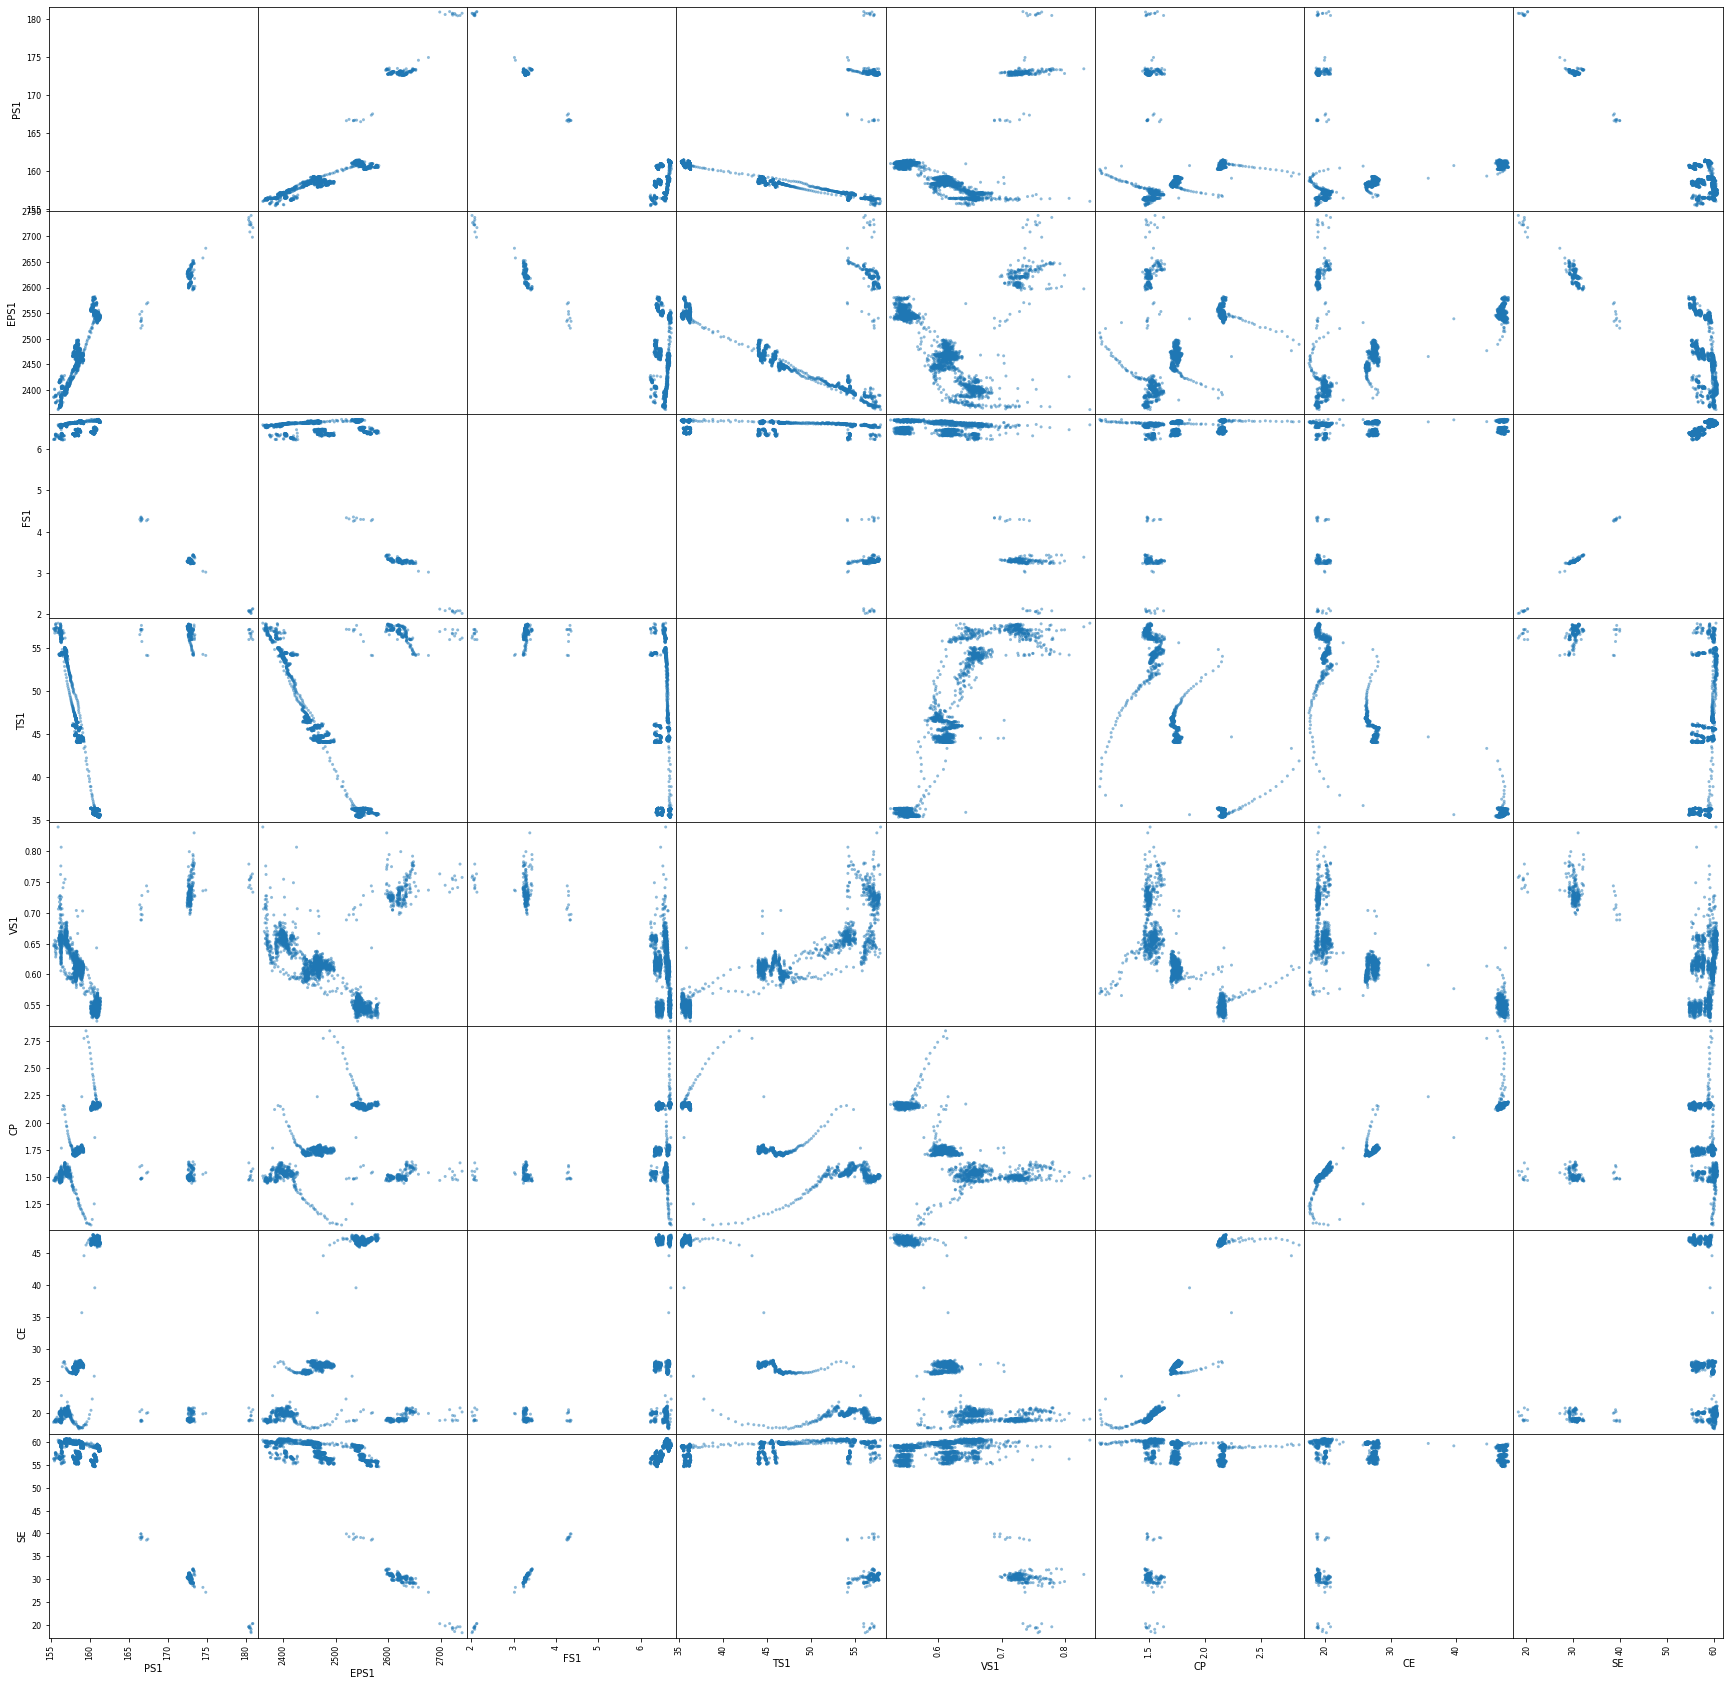

In [19]:
lf = ["PS1","EPS1",
      "FS1","TS1","VS1",
      "CP","CE","SE"] # Memilih fitur

datas = data[lf]

from pandas.plotting import scatter_matrix
axes = scatter_matrix(datas,figsize=(30, 30), diagonal = None)

<img src = "https://media.makeameme.org/created/i-cant-see-z5njkj.jpg" width = "480">

Dari grafik diatas, maka hubungan linear yang mungkin adalah hubungan antara FS1 (Volume flow) dan SE (Efficiency factor). Untuk mengetahui kuat/tidaknya hubungan linier antar dua variabel tersebut, maka dicari correlation coefficientnya seperti yang ditunjukkan langkah berikut.

### 2. Mencari Correlation Coefficient setiap data

Koefisien korelasi adalah nilai yang menunjukan kuat/tidaknya hubungan linier antar dua variabel. Koefisien korelasi biasa dilambangkan dengan huruf r dimana nilai r dapat bervariasi dari -1 sampai +1. Jika bernilai – (negatif) artinya korelasi antara kedua variabel tersebut bersifat berlawanan. Koefisien korelasi pearson atau Product Moment  Coefficient of Correlation adalah nilai yang menunjukan keeratan hubungan linier dua variabel dengan skala data interval atau rasio. Rumus yang digunakan adalah,

<img src="https://parameterd.files.wordpress.com/2013/09/116.png" width="40%">

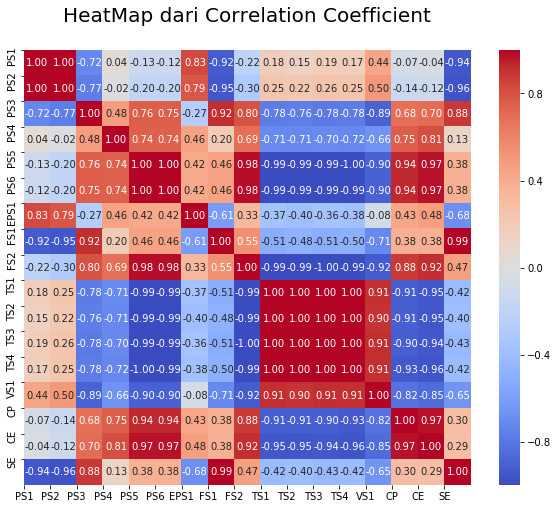

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = features.corr()
fig, ax = plt.subplots(figsize=(10, 8)) # Ukuran grafik

# Membuat Heat Map, yang bisa diberi anotasi dan nilai
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")

plt.xticks(range(len(corr.columns)), corr.columns) # Memberi label X
plt.yticks(range(len(corr.columns)), corr.columns) # Memberi label Y
plt.title("HeatMap dari Correlation Coefficient\n", fontsize= 20)

plt.show()

Dari grafik heatmap tersebut, nilai antara sensor-sensor yang mengukur besaran yang sama, memiliki korelasi yang tinggi, yaitu mendekati 1. Agar lebih menarik, maka dipilih dua data yang mengukur besaran berbeda, dan memiliki korelasi yang tinggi untuk selanjutnya dilakukan proses regresi. Dari grafik HeatMap tersebut, dipilih FS1 dan SE1. Jika diplotkan secara terpisah, maka hasilnya adalah sebagai berikut,

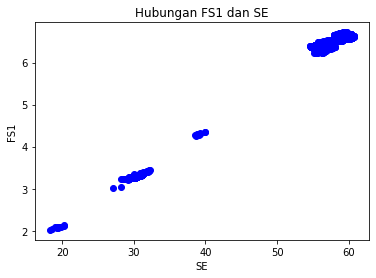

In [8]:
import matplotlib.pyplot as plt

df = pd.DataFrame()

x = data["SE"]
y = data["FS1"]

x_data = x
y_data = y

plt.plot(x,y,"bo")
plt.title("Hubungan FS1 dan SE")
plt.xlabel("SE")
plt.ylabel("FS1")
plt.show()

### 3. Statistik Deskriptif

In [9]:
display(data["FS1"].describe(include = "all")) # Menampilkan Statistik deskriptif untuk data FS1
display(data["SE"].describe(include = "all")) # Menampilkan Statistik deskriptif untuk data SE

count    2205.000000
mean        6.198549
std         1.032883
min         2.018572
25%         6.391670
50%         6.576673
75%         6.657508
max         6.722707
Name: FS1, dtype: float64

count    2205.000000
mean       55.287900
std         8.960189
min        18.276617
25%        56.270183
50%        58.758150
75%        59.656900
max        60.755300
Name: SE, dtype: float64

**Count** adalah hitungan nilai tidak termasuk NaN, dihitung untuk semua kolom. **Mean** adalah (rata-rata) dari semua nilai numerik dalam kolom (atau seri), dihitung hanya untuk tipe numerik kolom (atau seri). **Std** adalah tandar deviasi dari semua nilai numerik dalam kolom (atau seri), dihitung hanya untuk tipe numerik kolom (atau seri). **Min** adalah nilai minimum semua nilai numerik dalam kolom (atau seri), dihitung hanya untuk tipe numerik kolom (atau seri). **25%, 50%, 75%** adalah nilai persentil yang diberikan (masing-masing kuantil 1, 2 dan 3) dari semua nilai numerik dalam kolom (atau seri), dihitung hanya untuk tipe numerik kolom (atau seri). **Max** adalah nilai maksimum semua nilai numerik dalam kolom (atau seri), dihitung hanya untuk tipe numerik kolom (atau seri).


<img src = "https://media.giphy.com/media/5UG0AFAcIlQoZIiOuN/giphy.gif" width = "480">

Yang perlu dibahas disini adalah mean dan std. Mean (rata-rata) merupakan suatu ukuran pemusatan data. Mean suatu data juga merupakan statistik karena mampu menggambarkan bahwa data tersebut berada pada kisaran mean data tersebut. Berarti pada data diatas, nilai FS1 berada dikisaran 6.19 l/min, dan SE 55%.

Standar Deviasi dan Varians Salah satu teknik statistik yg digunakan untuk menjelaskan homogenitas kelompok. Varians merupakan jumlah kuadrat semua deviasi nilai-nilai individual thd rata-rata kelompok. Sedangkan akar dari varians disebut dengan standar deviasi atau simpangan baku. Standar Deviasi dan Varians Simpangan baku merupakan variasi sebaran data. Semakin kecil nilai sebarannya berarti variasi nilai data makin sama Jika sebarannya bernilai 0, maka nilai semua datanya adalah sama. Semakin besar nilai sebarannya berarti data semakin bervariasi. Nilai std FS1 lebih kecil daripada SE, sehingga SE lebih bervariasi.


### 4. Melakukan regresi linear ataupun non-linear

#### 4a. Regresi Linear
Dalam statistika, regresi linear adalah sebuah pendekatan untuk memodelkan hubungan antara variable terikat Y dan satu atau lebih variable bebas yang disebut X. Salah satu kegunaan dari regresi linear adalah untuk melakukan prediksi berdasarkan data-data yang telah dimiliki sebelumnya. Hubungan di antara variable-variabel tersebut disebut sebagai model regresi linear. Persamaannya adalah sebagai berikut,
\begin{align}
y & = \beta_0 + \beta_1*x \\
\end{align}

dimana $\beta_0$ menunjukkan interception, $\beta_1$ menunjukkan slope. Regresi linear dari SE dan FS1, adalah sebagai berikut,

In [10]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

np.random.seed(0)

# Menormalisasi data
xdata =x/max(x)
ydata =y/max(y)

# Membagi data sebagai data train dan data test dengan perbandingan 8:2
msk = np.random.rand(len(x)) < 0.8

train_x = np.array(xdata[msk]).reshape(-1,1)
test_x = np.array(xdata[~msk]).reshape(-1,1)
train_y = np.array(ydata[msk]).reshape(-1,1)
test_y = np.array(ydata[~msk]).reshape(-1,1)

model = LinearRegression()
model.fit(train_x,train_y)

intercept = model.intercept_ # Menghitung Intersepsi (b0)
slope = model.coef_[0] # Menghitung Slop (b1)
r_sq = model.score(train_x,train_y) # Menghitung hubungan variabel x dan y

pred_y = model.predict(test_x)

print('Intercept: {:0.2f}'.format(intercept[0]))
print('Slope: {:0.2f}'.format(slope[0]))
print('R\u00b2: {:0.2f}'.format(r_sq))

mae = mean_absolute_error(test_y, pred_y)  
mse = mean_squared_error(test_y, pred_y)

result = pd.DataFrame() # Membuat dataframe untuk menampung hasil
result["Linear"] = [mae,mse,r_sq]

Intercept: -0.02
Slope: 1.04
R²: 0.99


#### 4b. Regresi Non-linear
Selain regresi linear, pada data SE dan FS1 akan diterapkan regresi non-linear juga. Regresi non-linear yang digunakan antara lain regresi dengan menggunakan fungsi sigmoid, exponensial, dan kuadratik. Regresinya sebagai berikut,

Persamaan dari fungsi-fungsi tersebut adalah sebagai berikut,
1. Sigmoid: $ y = a + \frac{b}{1+ c^{(x-d)}}$
2. Exponensial: $ y = ae^{\beta x}$
3. Kubik: $ y = a + bx +cx^2+dx^3 $
4. Kuadratik $ y = a + bx +cx^2$

In [11]:
# Fungsi Sigmoid
def sigmoid(x, Beta_1, Beta_2):
    y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
    return y

# Fungsi Eksponensial
def expo(x,Beta_0, Beta_1):
    y = Beta_0*np.exp(Beta_1*x)
    return y

# Fungsi Kubik
def qubic(x,Beta_0,Beta_1,Beta_2,Beta_3):
    y = Beta_0+Beta_1*x+Beta_2*x**2+Beta_3*x**3
    return y

# Fungsi Kuadratik
def quad(x,Beta_0,Beta_1,Beta_2):
    y = Beta_0+Beta_1*x+Beta_2*x**2
    return y

###### <center> Bagaimana bentuk dari fungsi-fungsi tersebut?<center/>
<img src="https://media.giphy.com/media/l0HlRnAWXxn0MhKLK/source.gif" width = "480">

Untuk mendapatkan bentuk dari fungsi-fungsi tersebut, kita coba plotkan dengan inputan antara 0 sampai 5 dan beta sembarang.

Text(0.5, 1.0, 'Kuadratik')

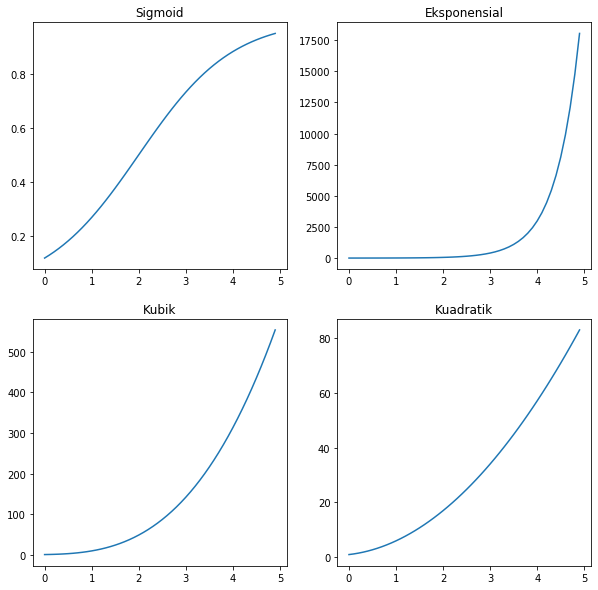

In [12]:
# Membuat input x
d_x = np.arange(0, 5.0, 0.1)

# Membuat output y dari input x, dengan nilai beta sembarang
d_y1 = sigmoid(d_x, 1,2)
d_y2 = expo(d_x,1,2)
d_y3 = qubic(d_x,1,2,3,4)
d_y4 = quad(d_x,1,2,3)

# Memplotkan
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(10, 10))
axes[0][0].plot(d_x,d_y1)
axes[0][0].set_title("Sigmoid")
axes[0][1].plot(d_x,d_y2)
axes[0][1].set_title("Eksponensial")
axes[1][0].plot(d_x,d_y3)
axes[1][0].set_title("Kubik")
axes[1][1].plot(d_x,d_y4)
axes[1][1].set_title("Kuadratik")

Setelah mengetahui bentuk dari fungsi-fungsi tersebut, maka dilakukan proses curve_fit untuk mendapatkan beta yang terbaik, dan mendapatkan modelnya. Kemudian Mean Absolute Error, Mean Square Error, dan R2 dihitung untuk mengevaluasi model tersebut.

In [13]:
from scipy.optimize import curve_fit
import numpy as np

func = ['Sigmoid','Eksponensial','Kubik','Kuadratik']

for i in range(len(func)):
    # Membangun model
    if(i == 0):
        popt, pcov = curve_fit(sigmoid, train_x.flatten(), train_y.flatten()) # Membangun model dengan data train
        y_hat = sigmoid(test_x, *popt) # Memprediksi dengan test set
    if(i == 1):
        popt, pcov = curve_fit(expo, train_x.flatten(), train_y.flatten()) # Membangun model dengan data train
        y_hat = expo(test_x, *popt) # Memprediksi dengan test set
    if(i == 2):
        popt, pcov = curve_fit(qubic, train_x.flatten(), train_y.flatten()) # Membangun model dengan data train
        y_hat = qubic(test_x, *popt) # Memprediksi dengan test set
    if(i == 3):
        popt, pcov = curve_fit(quad, train_x.flatten(), train_y.flatten()) # Membangun model dengan data train
        y_hat = quad(test_x, *popt) # Memprediksi dengan test set  
    
    mae = np.mean(np.absolute(y_hat - test_y)) # Menghitung Mean Absolute Error
    mse = np.mean((y_hat - test_y) ** 2) # Menghitung Mean Square Error
    r2  = r2_score(y_hat , test_y) # Menghitung R2

    # Evaluasi
    print("\n{}".format(func[i]))
    print("Mean absolute error (MAE) using {} Function: {:0.2E} ".format(func[i],mae))
    print("Residual sum of squares (MSE) using {} Function: {:0.2E}".format(func[i],mse))
    print("R2-score using {} Function: {:0.2E}".format(func[i],r2))
    
    result[func[i]] = [mae,mse,r2] # Menyimpan hasil

result.rename(index={0:'MAE',1:'MSE', 2:'R2'}, inplace=True)
print('\n')
display(result)


Sigmoid
Mean absolute error (MAE) using Sigmoid Function: 1.38E-02 
Residual sum of squares (MSE) using Sigmoid Function: 3.54E-04
R2-score using Sigmoid Function: 9.83E-01

Eksponensial
Mean absolute error (MAE) using Eksponensial Function: 1.99E-02 
Residual sum of squares (MSE) using Eksponensial Function: 5.65E-04
R2-score using Eksponensial Function: 9.72E-01

Kubik
Mean absolute error (MAE) using Kubik Function: 8.66E-03 
Residual sum of squares (MSE) using Kubik Function: 1.10E-04
R2-score using Kubik Function: 9.95E-01

Kuadratik
Mean absolute error (MAE) using Kuadratik Function: 1.04E-02 
Residual sum of squares (MSE) using Kuadratik Function: 1.65E-04
R2-score using Kuadratik Function: 9.92E-01




,Linear,Sigmoid,Eksponensial,Kubik,Kuadratik
MAE,0.013421,0.013849,0.019892,0.008662,0.010408
MSE,0.000250,0.000354,0.000565,0.000110,0.000165
R2,0.989401,0.982658,0.971797,0.994687,0.992019


In [14]:
print("Nilai R2 tertinggi adalah:",result.loc["R2"].idxmax())
print("Nilai MAE terendah adalah:",result.loc["MAE"].idxmin())
print("Nilai MSE terendah adalah:",result.loc["MSE"].idxmin())

Nilai R2 tertinggi adalah: Kubik
Nilai MAE terendah adalah: Kubik
Nilai MSE terendah adalah: Kubik


###### <center>Kita sudah mendapatkan model regresi yang tepat.<center/>

<img src = "https://media.giphy.com/media/mgqefqwSbToPe/source.gif" width = "480">

##### Kesimpulan:
Dari tabel diatas, regresi terbaik adalah Kubik, dengan nilai MAE dan MSE terendah dari yang lain, serta nilai R2 yang terbesar. Sehingga jika digrafikkan,

(1738, 1) (1738,)


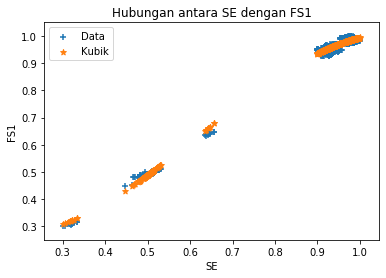

In [15]:
print(train_x.shape,train_x.flatten().shape)

popt1, pcov1 = curve_fit(qubic, train_x.flatten(), train_y.flatten())
y_hat = qubic(test_x, *popt1) # Memprediksi dengan test set
y = qubic(xdata, *popt1)
plt.scatter(xdata, ydata,marker = '+',label = "Data")
plt.scatter(xdata,y, marker = '*',label = "Kubik")

plt.legend(loc='best')
plt.xlabel('SE')
plt.ylabel('FS1')
plt.title("Hubungan antara SE dengan FS1")
plt.show()

##### Berapa volume aliran jika efisiensi faktornya 90%?

In [16]:
SE = 90 # Menentukan SE
FS1 = qubic(SE/max(x_data),*popt1)*max(y_data) # Menghitung FS1 dari fungsi terbaik (Kubik)

print("volume aliran jika efisiensi faktornya {:d}% adalah {:.2f}".format(SE,FS1))

volume aliran jika efisiensi faktornya 90% adalah 2.83


## Classification
##### Apakah kita bisa mengetahui dan mengklasifikasi stabilitas Hydraulic berdasarkan sensor-sensor yang ada?
Seperti yang dijelaskan sebelumnya, dalam dataset ini, label terdiri dari kondisi pendingin, kondisi katup, kebocoran pompa dalam, akumulator hidrolik, dan tanda stabilitas. Kondisi pendingin terdiri dari _close to total failure, reduced effifiency, dan full efficiency_. Konisi katup terdiri dari _optimal switching behavior, small lag, severe lag, dan close to total failure_. Kebocoran pompa dalam terdiri dari _no leakage, weak leakage, severe leakage_. Akumulator hidrolik terdiri dari _optimal pressure, slightly reduced pressure, severely reduced pressure, dan close to total failure_. Tanda stabilitas terdiri dari _conditions were stable dan static conditions might not have been reached yet_.

###### <center>Label mana yang digunakan untuk klasifikasi?<center/>
<img src="https://media.giphy.com/media/xUA7aUNw61j9Vdzs0U/source.gif" width = "480">

Untuk proses klasifikasi, label yang diambil adalah _Tanda Stabilitas_ , dengan label _conditions were stable_ dengan nilai 0 dan _static conditions might not have been reached yet_ dengan nilai 1. Tabel ini menunjukkan kondisi stabilitas dari Hydraulic. Sehingga tujuan dari proses klasifikasi ini adalah mengklasifikasi kondisi stabilitas hydraulic berdasarkan hasil pembacaan sensor-sensor yang ada dalam hydraulic tersebut.

Pertama, pilih data input yang akan digunakan serta target yang akan dipakai klasifikasi. Setelah itu data displit menjadi data train dan data test. Dan setelah itu data dinormalisasi

In [17]:
# Memilih input
X = data[["PS1","PS2","PS3","PS4","PS5","PS6","EPS1",
                "FS1","FS2","TS1","TS2","TS3","TS4","VS1",
                "CP","CE","SE"]]

# Memilih target
y = data[['Stable flag']]

# Mensplit data test dan data train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

# Normalisasi data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

result = dict()

Disini, digunakan beberapa Classifier, dan dicari Classifier yang terbaik dari classifier-classifier tersebut. Classifier yang digunakan antara lain _LogisticRegression, KNeighborsClassifier, LinearDiscriminantAnalysis, GaussianNB_ , dan _SVC_

<img src = "https://media.giphy.com/media/2vqB3SPyzhSGO6ORQR/giphy.gif" width = "480">

Untuk mengetahui lebih lanjut mengenai classifier-classifier tersebut, bisa mengunjungi:
1. _LogisticRegression_ : [link](https://en.wikipedia.org/wiki/Logistic_regression)
2. _KNeighborsClassifier_ : [link](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)
3. _LinearDiscriminantAnalysis_ : [link](https://en.wikipedia.org/wiki/Linear_discriminant_analysis)
4. _GaussianNB_ : [link](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)
5. _SVC_ : [link](https://en.wikipedia.org/wiki/Support-vector_machine)

In [18]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
result['LogisticRegression'] = [logreg.score(X_train, y_train), logreg.score(X_test, y_test)]

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
result['KNeighborsClassifier'] = [knn.score(X_train, y_train), knn.score(X_test, y_test)]


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
result['LinearDiscriminantAnalysis'] = [lda.score(X_train, y_train), lda.score(X_test, y_test)]


from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
result['GaussianNB'] = [gnb.score(X_train, y_train), gnb.score(X_test, y_test)]


from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
result['SVC'] = [svm.score(X_train, y_train), svm.score(X_test, y_test)]

my_result = pd.DataFrame(result)
my_result.rename(index={0:'Train',1:'Test'}, inplace=True)

index = my_result.idxmax(axis = 1)

print("Classifier terbaik untuk data Train: {}".format(index[0]))
print("Classifier terbaik untuk data Test: {}".format(index[1]))

display(my_result)

Classifier terbaik untuk data Train: KNeighborsClassifier
Classifier terbaik untuk data Test: KNeighborsClassifier


,LogisticRegression,KNeighborsClassifier,LinearDiscriminantAnalysis,GaussianNB,SVC
Train,0.773745,0.969147,0.914701,0.561404,0.728978
Test,0.771739,0.958333,0.916667,0.507246,0.757246


##### Kesimpulan
Dari classifier-classifier yang digunakan, classifier yang terbaik adalah KNN. Dengan classifier ini, sistem dapat mengklasifikasikan kondisi hydraulic berdasarkan data yang didapat dari sensor-sensor yang terpasang di hydraulic tersebut. Keakuratan dari klasifier ini adalah 95%. Dengan keakuratan tersebut, classifier diperkirakan mampu memprediksi kondisi hydraulic untuk kedepannya.

<img src = "https://media.giphy.com/media/HX3lSnGXZnaWk/source.gif" width ="480">

# <center>Finish<center/>